# Employees data

For this project we will analyse two emloyee exist surveys to answer the following quesitons.

1/ Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2/ Are younger employees resigning due to some kind of dissatisfaction?
What about older employees?

## Data sources

There are two data souces for this project: two exit surveys from employees of two organisations in Queensland, Australia. Both have been downloaded from the Australian govennment website.
* The Department of Education, Training and Employment (DETE)— [DETE exit survey](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and
* The Technical and Further Education (TAFE) institute —[TAFE exit survey](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).
 

### Columns' description

**Dete columns**
* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

**TAFE columsn**
* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [1]:
#importing dependencies
import pandas as pd
import numpy as np

In [2]:
#read surveys into datafraes
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## Exploring Dete survey

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
#check for null values
missing = dete_survey.isnull().sum().sort_values(ascending=False)

In [6]:
dete_survey.shape

(822, 56)

In [7]:
#calculate % of missing values in each column
percent_missing = dete_survey.isnull().sum() * 100 / len(dete_survey)
missing_value_dete = pd.DataFrame({'column_name': dete_survey.columns, 
                                   'percent_missing': percent_missing})
missing_value_dete.sort_values("percent_missing", ascending=False)


,column_name,percent_missing
Torres Strait,Torres Strait,99.635036
South Sea,South Sea,99.148418
Aboriginal,Aboriginal,98.053528
Disability,Disability,97.201946
NESB,NESB,96.107056
Business Unit,Business Unit,84.671533
Classification,Classification,44.647202
Opportunities for promotion,Opportunities for promotion,10.583942
Career Aspirations,Career Aspirations,9.245742
Wellness programs,Wellness programs,6.812652


There are many missing values in several columns of the DETE dataset.

There are 6 columns with more than 80% of values missing, 5 of which miss more than 96% of values.
* Torres Strait	99.635036
* South Sea	99.148418
* Aboriginal	98.053528
* Disability	97.201946
* NESB	96.107056
* Business Unit 84.671533

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

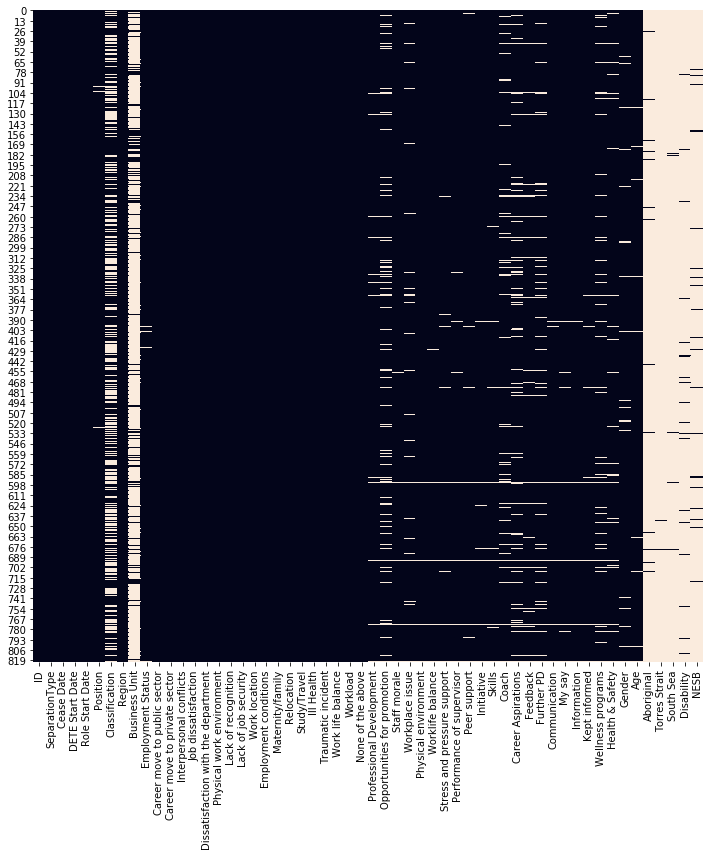

In [9]:
#visualise missing values as a heatmap, black are the non-nulls
plt.figure(figsize=(12, 12))
sns.heatmap(dete_survey.isnull(),cbar=False)
plt.show()

## Exploring TAFE survey

In [10]:
tafe_survey.shape

(702, 72)

In [11]:
#TAFE info
tafe_info = tafe_survey.info()
tafe_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [12]:
#see a sample of rows
tafe_survey[5:10]

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,NaN,NaN,NaN,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Yes,Yes,Yes,Yes,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,No,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2


In [13]:
#check for null values
missing = tafe_survey.isnull().sum().sort_values(ascending=False)

In [14]:
#show % of missing values
percent_missing = tafe_survey.isnull().sum() * 100 / len(tafe_survey)
missing_value_tafe = pd.DataFrame({'column_name': tafe_survey.columns, 
                                   'percent_missing': percent_missing})
missing_value_tafe.sort_values("percent_missing", ascending=False)


,column_name,percent_missing
Main Factor. Which of these was the main factor for leaving?,Main Factor. Which of these was the main facto...,83.903134
InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Corpo...,38.461538
Contributing Factors. Travel,Contributing Factors. Travel,37.749288
Contributing Factors. Other,Contributing Factors. Other,37.749288
Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Public Sec...,37.749288
Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Private Se...,37.749288
Contributing Factors. Career Move - Self-employment,Contributing Factors. Career Move - Self-emplo...,37.749288
Contributing Factors. Ill Health,Contributing Factors. Ill Health,37.749288
Contributing Factors. Maternity/Family,Contributing Factors. Maternity/Family,37.749288
Contributing Factors. Dissatisfaction,Contributing Factors. Dissatisfaction,37.749288


This dataset is missing a lot of values. 

It's natural some of them are missing as the columns are Y/N answers-- a lot of missing values could just be `No`s.
There are many repeating values in how many % of values are missing, eg. 
* 37.749288
* 20.940171
* 13.105413
* 12.678063

Which suggests some regularity. 

### Initial observations

* Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many columns which hold the same data, and only differ by the column name.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.


# Data Cleaning

## Handling NaNs

DETE survey has a whole column with "not stated", we'll treat it as NaNs. We can read the csv into the dataframe again treating these values as NaN.

In [15]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = "Not Stated")

There are many unnecessary columns in both datasets. Columns between 28 nd 49 in DETE and 17 to 66 in TAFE.

We can drop them to make the analysis easier.

In [16]:
#dropping columns from DETE
dete_survey_updated= dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [17]:
#dropping useless columns from TAFE, unnecessary for analysis
tafe_survey_updated= tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [18]:
#check how many columns are left
dete_survey_updated.shape

(822, 35)

In [19]:
tafe_survey_updated.shape

(702, 23)

In [20]:
#check names and types of columns left
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [21]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

## Standardizing column names
Each dataframe contains many of the same columns only with different names.

We'll standardise columns names in the DETE survey.

In [22]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [23]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

We'll now rename columns in the TAFE survey to match the column names in DETE survey which we're intereted in for the analysis.

In [24]:
tafe_col_names = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}

In [25]:
tafe_survey_updated = tafe_survey_updated.rename(columns=tafe_col_names) 

In [26]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [27]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [28]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


## Investigating reasons of resignation

Reasons for resignation for DETE &TAFE are stored in the `separationtype` column.

In [29]:
#check for unique values in the separation type column
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [30]:
#check for unique values in the separation type column
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [31]:
#select rows with resignation as a reason for job change from DETE
resignation_types = "Resignation-Other reasons","Resignation-Other employer","Resignation-Move overseas/interstate"
dete_resignations= dete_survey_updated[dete_survey_updated["separationtype"].isin(resignation_types)].copy()
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [32]:
#select rows with resignation as a reason for job change from tafe
tafe_resignations= tafe_survey_updated[tafe_survey_updated["separationtype"]=="Resignation"].copy()
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


It'd be useful to know how many emloyes resigned due to which resignation type.

In [33]:
#create a dictionary with names of contributing factors and numbers
factors = []
counts = []

for column in range(5,16):
    #extracting factor names, withount the intro bit
    name = tafe_resignations.columns[column].replace("Contributing Factors. ","")
    factors.append(name)
    
    #find pattern
    pattern = r"([a-z A-Z]+[-]?[a-z A-Z]+)"
    count=tafe_resignations.iloc[:,column].str.extractall(pattern)
    
    #count how many times the pattern appears
    c = count.shape[0]
    
    #add to the list of counts
    counts.append(c)


reasons = dict(zip(factors,counts))
for key, value in sorted(reasons.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

Dissatisfaction: 110
Career Move - Private Sector : 99
Other: 86
Job Dissatisfaction: 62
Career Move - Public Sector : 48
Maternity/Family: 40
Career Move - Self-employment: 26
Interpersonal Conflict: 24
Ill Health: 21
Travel: 17
Study: 16


It looks like most people, 173 resigned due to a career move and 172 due to dissatsfaction. 

## Verifying the data
To calculate the time spent in a company among the people who resigned, we should first verify if the years in the `cease_date` and `dete_start_date` columns make sense.

* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.

* Most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [34]:
#check the types of values we find in the cease_date column
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [35]:
#extract years from the cease date values
dete_resignations['years']= (dete_resignations['cease_date']
                              .str.split('/', expand=True)
                              .iloc[:,1]
                              .astype(float)
                             )
dete_resignations['years'].value_counts(dropna=False)

NaN       212
2013.0     72
2014.0     22
2012.0      3
2006.0      1
2010.0      1
Name: years, dtype: int64

In [36]:
#count values of start dates in dete
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

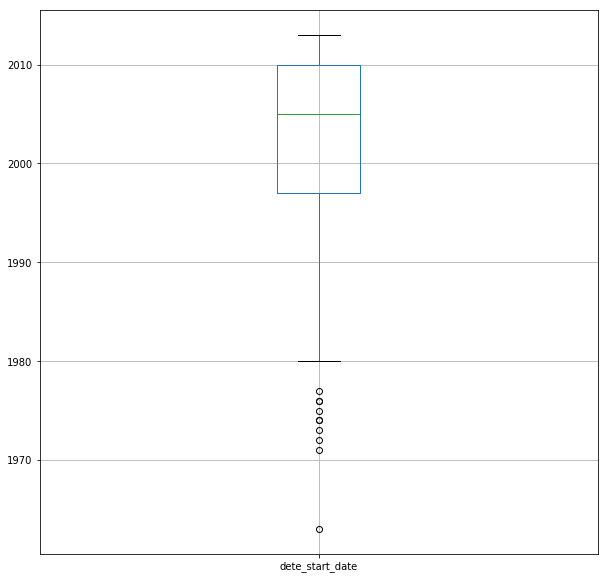

In [37]:
#see all start dates as a boxplot
dete_resignations.boxplot(column='dete_start_date', figsize=(10,10))

In [38]:
#investigate types of values in dete cease_date column
dete_resignations["cease_date"].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [39]:
#prepare the date column for manipulations, select only years
dete_resignations["cease_date"] = (dete_resignations["cease_date"]
                                   .str.split("/")
                                   .str[-1]
                                   .str.strip()
                                   .astype(float)
                                  )

In [40]:
dete_resignations["cease_date"].value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [41]:
dete_resignations["dete_start_date"].value_counts(dropna=False)

NaN       28
2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1998.0     6
2002.0     6
1994.0     6
1996.0     6
1992.0     6
2003.0     6
1980.0     5
1990.0     5
1993.0     5
1997.0     5
1989.0     4
1995.0     4
1988.0     4
1991.0     4
2001.0     3
1986.0     3
1985.0     3
1976.0     2
1983.0     2
1974.0     2
1963.0     1
1972.0     1
1984.0     1
1975.0     1
1973.0     1
1987.0     1
1982.0     1
1971.0     1
1977.0     1
Name: dete_start_date, dtype: int64

### Time of service
We need to calculte the time of service for both dataframes.

`tafe_resignations` dataframe already contains a "service" column, renamed to `institute_service`. 

In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`. 

In [42]:
dete_resignations.describe()

,id,cease_date,dete_start_date,role_start_date,years
count,311.000000,300.00000,283.000000,271.000000,99.000000
mean,427.739550,2012.60000,2002.067138,1999.653137,2013.090909
std,235.028398,0.75403,9.914479,109.965675,0.915746
min,4.000000,2006.00000,1963.000000,200.000000,2006.000000
25%,256.500000,2012.00000,1997.000000,2004.000000,2013.000000
50%,434.000000,2013.00000,2005.000000,2009.000000,2013.000000
75%,626.500000,2013.00000,2010.000000,2011.000000,2013.000000
max,823.000000,2014.00000,2013.000000,2013.000000,2014.000000


There is a strange minimal value in role start date, with 200. Not possible as a year of starting a job. We'll find out if this is the only anomalous value and fix it.

In [43]:
#explore the column role start date
dete_resignations['role_start_date'].sort_values(ascending=True)

390     200.0
116    1976.0
43     1976.0
40     1980.0
20     1982.0
        ...  
769       NaN
794       NaN
798       NaN
802       NaN
821       NaN
Name: role_start_date, Length: 311, dtype: float64

In [44]:
dete_resignations[dete_resignations['role_start_date']<1975]

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,years
390,391,Resignation-Other employer,2013.0,2000.0,200.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,NaN


We can make an intelligent guess the value in the role start date column for this row is a typo, and is missing a 0. We can change this value. 

In [45]:
dete_resignations.iloc[137,4]

200.0

In [46]:
dete_resignations.iloc[137,4] = 2000.0

In [47]:
#calculate service time by subtracting end time from start time
#create new column to store that
dete_resignations["institute_service"] = dete_resignations["cease_date"]-dete_resignations["dete_start_date"]
dete_resignations["institute_service"].value_counts(dropna=False, ascending=False)

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
12.0     6
22.0     6
17.0     6
10.0     6
14.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
39.0     3
32.0     3
19.0     3
21.0     3
36.0     2
30.0     2
25.0     2
28.0     2
26.0     2
29.0     1
42.0     1
38.0     1
27.0     1
41.0     1
35.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

## Analysing dissatisfaction

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 

`tafe_survey_updated`:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

`dete_survey_updated`:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [48]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [49]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [50]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].isnull().value_counts()

False    332
True       8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [51]:
#function to update values
#if value is NaN returns np.nan
#if value "-" return False
#if any other value return True

def update_vals(col):
    if pd.isnull(col):
        return np.nan    
    if col == "-":
        return False
    else:
        return True


In [52]:
#apply the function above to two columns to 
#create a new column 'dissatisfied' with these values: 
#if a person was dissatisfieed with a job True, 
#if other reason false, if missing NaN
tafe_resignations["dissatisfied"]=tafe_resignations[["Contributing Factors. Job Dissatisfaction","Contributing Factors. Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)

#create a copy
tafe_resignations_up=tafe_resignations.copy()

In [53]:
tafe_resignations["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [54]:
#create a new column in dete 
#if a person was dissatisfieed with a job True, if other reason false, if missing NaN
dete_resignations["dissatisfied"]=dete_resignations[["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment", "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions", "work_life_balance", "workload"]].any(axis=1, skipna=False)
dete_resignations_up=dete_resignations.copy()
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [55]:
tafe_resignations_up["institute_service"].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [56]:
dete_resignations_up["institute_service"].value_counts(dropna=False)

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
12.0     6
22.0     6
17.0     6
10.0     6
14.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
39.0     3
32.0     3
19.0     3
21.0     3
36.0     2
30.0     2
25.0     2
28.0     2
26.0     2
29.0     1
42.0     1
38.0     1
27.0     1
41.0     1
35.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

## Merging dataframes
For further analysis we need to merge the dataframes.

To easily distinguish between the two dataframes after merging we'll add a column to each, to identify the source.

We combine the dataframes and drop columns with less than 500 non-null values.

In [57]:
dete_resignations_up["institute"]="DETE"
tafe_resignations_up["institute"]="TAFE"

In [58]:
#combine dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], join ='outer', sort=False)

In [59]:
combined.shape

(651, 54)

In [60]:
#drop the columns with less than 500 non null vals
combined_updated=combined.dropna(axis=1, thresh=500)

In [61]:
#display the types of values we have in the column
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
36.0                   2
30.0                   2


In [62]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
id                   651 non-null float64
separationtype       651 non-null object
cease_date           635 non-null float64
position             598 non-null object
employment_status    597 non-null object
gender               592 non-null object
age                  596 non-null object
institute_service    563 non-null object
dissatisfied         643 non-null object
institute            651 non-null object
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


## Categorising institute service
The column `institute_service` currently contains values in a couple of different forms.

To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [63]:
#create a regex pattern to extract digits
#for the ranges, like 1-2 or 3-4, it will exxtract the first digit
pattern = r'(\d+)'

In [64]:
combined_updated = combined_updated.copy()

In [65]:
#convert them into strings
combined_updated["institute_service"]=combined_updated["institute_service"].astype('str')
#extract numbers and convert into floats
combined_updated["institute_service"]=combined_updated["institute_service"].str.extract(pattern).astype('float')

In [66]:
combined_updated["institute_service"].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [67]:
#function to match length of service with a category
def match_values(col):
    if col <3:
        return "New"
    if (col >=3) & (col<6):
        return 'Experienced'
    if (col>=7) & (col<=10):
        return 'Established'
    if col>=11:
        return "Veteran"
    if pd.isnull(col):
        return np.nan


In [68]:
#apply function to columns
combined_updated["service_cat"]= combined_updated["institute_service"].apply(match_values)

In [69]:
resignation_status = combined_updated["service_cat"].value_counts(dropna=False)
resignation_status

New            193
Experienced    155
Veteran        136
NaN            105
Established     62
Name: service_cat, dtype: int64

Looking at the non NaN values the highest resignation numbers were observed among the New Employees, those less than 3 years at the company.

To visualise this we can make a pie chart.

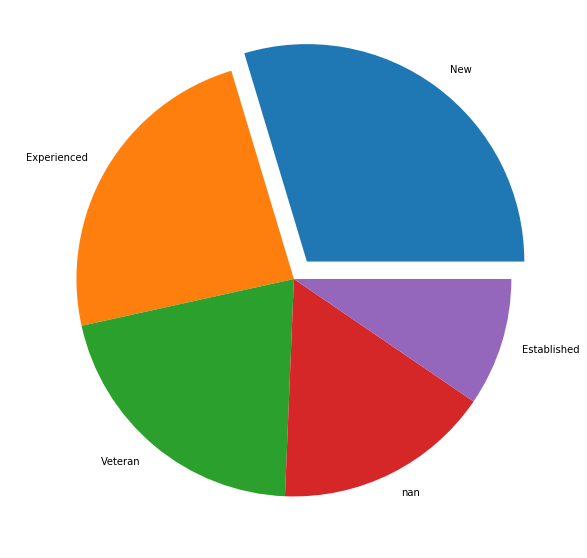

In [70]:
plt.figure(figsize=(10,10))
plt.axis('off')
resignation_status.plot.pie(explode=(0.1, 0, 0, 0, 0))

## Dissatisfied column
To plot the number/percentage of dissatisfied employees by category of service, i.e. the length of service, we'll need to fill in missing values in the `dissatisfied` column and then aggregate the data. 

In [71]:
#check how many NaNs we have
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [72]:
#we decide to replace them with false
combined_updated['dissatisfied'].fillna(value=False, inplace=True)

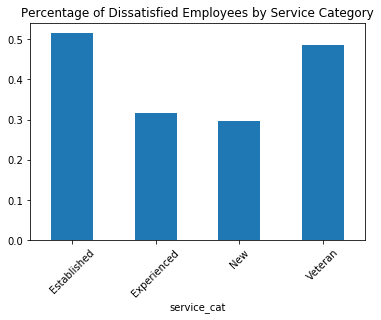

In [73]:
#plot the results as a bar plot
plot_to_plot= combined_updated.pivot_table(values='dissatisfied', index='service_cat')
plot_to_plot.plot(kind='bar', rot=45, title="Percentage of Dissatisfied Employees by Service Category", legend=False)


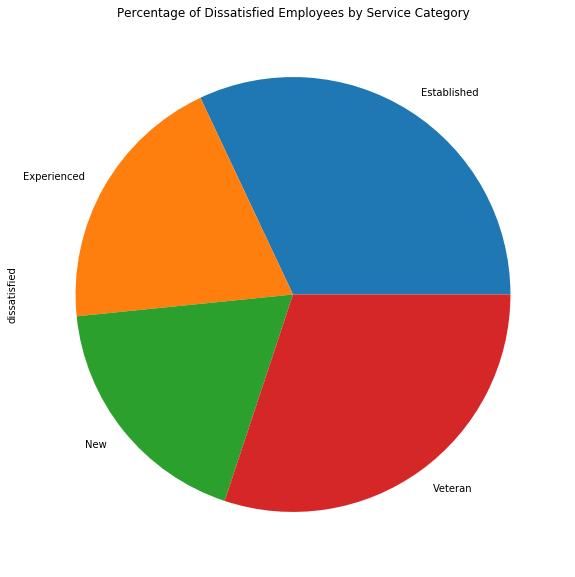

In [74]:
#plot as a pie chart
plot_to_plot.plot.pie(y='dissatisfied', legend=False, figsize=(10,10),title='Percentage of Dissatisfied Employees by Service Category' )

**Observations**
Most of the dissatisfied employees were in the Established and Vetran category. These areemployees into whm the most resources were investd, and who are potentially the most valuable for the company. To prevent them from quitting, it would be valuable to investigate how one can attend to the reasons of their dissatisfaction.

## Steps for further analysis
1/ Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. 
* How many people in each career stage resigned due to some kind of dissatisfaction?

2/ Clean the age column. 
* How many people in each age group resgined due to some kind of dissatisfaction?

3/ Instead of analyzing the survey results together, analyze each survey separately. 
* Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?